# Data from https://chronicdata.cdc.gov/Heart-Disease-Stroke-Prevention/Stroke-Mortality-Data-Among-US-Adults-35-by-State-/tqwu-4a7k 

# https://data.cdc.gov/browse?limitTo=datasets&q=stroke&sortBy=last_modified&utf8=%E2%9C%93

In [2]:
# make sure to install this package before running:
# python -m pip install --upgrade pip
!pip install sodapy

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

from sodapy import Socrata

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


National Vital Statistics System (NVSS) - National Cardiovascular Disease Surveillance Data
Dataset Identifier: kztq-p2jf
Total Rows: 158080
Source Domain: chronicdata.cdc.gov

Stroke Mortality Data Among US Adults (35+) by State/Territory and County 2016-2018
Dataset Identifier: tqwu-4a7k
Total Rows: 59094
Source Domain: chronicdata.cdc.gov








In [22]:
# data
# data = "assets/data/Stroke_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County___2016-2018.csv"

# The Host Name for the API endpoint (the https:// part will be added automatically)

data_url='chronicdata.cdc.gov'

# The data set at the API endpoint 
data_set="tqwu-4a7k"   

# The app token created in the prior steps
MyAppToken='px7JjOQLMt0zT2f5o7utbLBcj'
username="mpmarinkovic@gmail.com"
password="!00Hagase"

# Create the client to point to the API endpoint
client = Socrata(data_url,
                 MyAppToken,
                 username=username,
                 password=password)

     
# Set the timeout to 60 seconds    
client.timeout = 60
print (client)






In [23]:
# Get metadata about the target data set
metadata = client.get_metadata(data_set)
[x['name'] for x in metadata['columns']]

['Year',
 'LocationAbbr',
 'LocationDesc',
 'GeographicLevel',
 'DataSource',
 'Class',
 'Topic',
 'Data_Value',
 'Data_Value_Unit',
 'Data_Value_Type',
 'Data_Value_Footnote_Symbol',
 'Data_Value_Footnote',
 'StratificationCategory1',
 'Stratification1',
 'StratificationCategory2',
 'Stratification2',
 'TopicID',
 'LocationID',
 'Y_lat',
 'X_lon']

In [ ]:
# The SoDaPy library converts this JSON object to a Python list of dictionaries
# SODA APIs are paged, and return a maximum of 50,000 records per page
# good practice to split up the request into multiple smaller queries 

# Get the total number of records in our target data set
record_count = client.get(data_set, select="COUNT(*)")
record_count
# while loop to fectch the record_limit during each iteration
start = 0             # Start at 0
record_limit = 10000     # Fetch 2000 rows at a time
results =[]           # Empty out our result list
while True:
     # Fetch the set of records starting at 'start'
     results.extend( client.get(data_set, offset=start, limit=record_limit))
     # Move up the starting record
     start = start + record_limit
     # If we have fetched all of the records, bail out
     if (start > int(record_count[0]['COUNT']) ):
        break


# results = client.get(data_set, limit=2000)

In [20]:
# Convert the list of dictionaries to a Pandas data frame
df = pd.DataFrame.from_records(results)
df.head(2)
# Save the data frame to a CSV file
# df.to_csv("my_311_data.csv")

,year,locationabbr,locationdesc,geographiclevel,datasource,class,topic,data_value,data_value_unit,data_value_type,stratificationcategory1,stratification1,stratificationcategory2,stratification2,topicid,locationid,y_lat,x_lon,data_value_footnote_symbol,data_value_footnote
0,2017,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Stroke Mortality,2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T6,02013,55.442393334,-161.9599296,NaN,NaN
1,2017,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Stroke Mortality,0,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",Gender,Overall,Race/Ethnicity,Overall,T6,02016,53.648343064,-166.9175329,NaN,NaN


In [27]:
# Check datacounts
df.count()

year                          59094
locationabbr                  59094
locationdesc                  59094
geographiclevel               59094
datasource                    59094
class                         59094
topic                         59094
data_value                    28095
data_value_unit               59094
data_value_type               59094
stratificationcategory1       59094
stratification1               59094
stratificationcategory2       59094
stratification2               59094
topicid                       59094
locationid                    59094
y_lat                         59076
x_lon                         59076
data_value_footnote_symbol    30999
data_value_footnote           30999
dtype: int64

In [25]:
# Check datatypes
data_df.dtypes

Year                            int64
LocationAbbr                   object
LocationDesc                   object
GeographicLevel                object
DataSource                     object
Class                          object
Topic                          object
Data_Value                    float64
Data_Value_Unit                object
Data_Value_Type                object
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
StratificationCategory1        object
Stratification1                object
StratificationCategory2        object
Stratification2                object
TopicID                        object
LocationID                      int64
Y_lat                         float64
X_lon                         float64
dtype: object

In [ ]:
# reorganize columns
datasub_df = data_df[['Year','Y_lat','X_lon','LocationAbbr','LocationDesc',                   
                   'Data_Value','Data_Value_Unit', 'Class','Topic']]
                   
datasub_df.head()

,Year,Y_lat,X_lon,LocationAbbr,LocationDesc,Data_Value,Data_Value_Unit,Class,Topic
0,2017,55.442393,-161.959930,AK,Aleutians East,2.0,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality
1,2017,53.648343,-166.917533,AK,Aleutians West,0.0,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality
2,2017,61.159145,-149.104559,AK,Anchorage,67.2,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality
3,2017,60.923648,-159.753262,AK,Bethel,104.6,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality
4,2017,58.753496,-156.694662,AK,Bristol Bay,NaN,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality


In [ ]:
#Rename columns 
datasub_df = datasub_df.rename(columns={"Y_lat":"Lat", "X_lon":"Long","LocationAbbr":"State", "LocationDesc": "Country_Region"})

datasub_df.head() 

,Year,Lat,Long,State,Country_Region,Data_Value,Data_Value_Unit,Class,Topic
0,2017,55.442393,-161.959930,AK,Aleutians East,2.0,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality
1,2017,53.648343,-166.917533,AK,Aleutians West,0.0,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality
2,2017,61.159145,-149.104559,AK,Anchorage,67.2,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality
3,2017,60.923648,-159.753262,AK,Bethel,104.6,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality
4,2017,58.753496,-156.694662,AK,Bristol Bay,NaN,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality


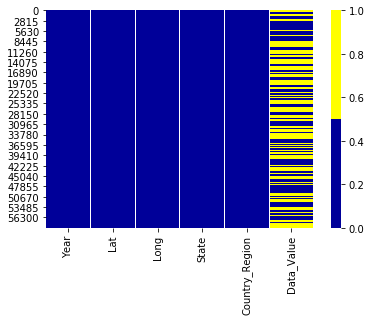

In [ ]:
#cleaing data

cols = datasub_df.columns[:6] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(datasub_df[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in datasub_df.columns:
    pct_missing = np.mean(datasub_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Year - 0.0%
Lat - 0.0%
Long - 0.0%
State - 0.0%
Country_Region - 0.0%
Data_Value - 52.0%
Data_Value_Unit - 0.0%
Class - 0.0%
Topic - 0.0%


In [ ]:
#drop the rows that has counties with missing values
clean_df= datasub_df.dropna()
clean_df.head()

,Year,Lat,Long,State,Country_Region,Data_Value,Data_Value_Unit,Class,Topic
0,2017,55.442393,-161.959930,AK,Aleutians East,2.0,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality
1,2017,53.648343,-166.917533,AK,Aleutians West,0.0,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality
2,2017,61.159145,-149.104559,AK,Anchorage,67.2,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality
3,2017,60.923648,-159.753262,AK,Bethel,104.6,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality
5,2017,63.678820,-149.960801,AK,Denali,75.2,"per 100,000 population",Cardiovascular Diseases,Stroke Mortality


In [ ]:
# Save Cleaned/Organized df to csv
clean_df.to_csv("assets/data/stroke_death_clean.csv", index=False)
